In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import math

import acquire as a

In [2]:
from vega_datasets import data

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [3]:
df1 = data.sf_temps()

## sf_temps

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [4]:
df1['date'] = pd.to_datetime(df1['date'])

In [5]:
df1 = df1.set_index(df1['date'])

<AxesSubplot:xlabel='date'>

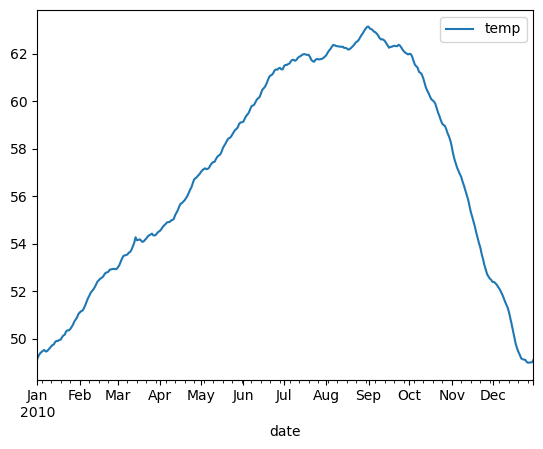

In [6]:
df1.resample('D').mean().plot()

2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

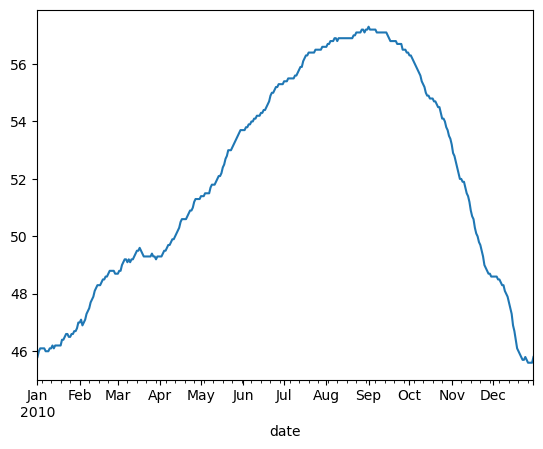

In [7]:
df1.resample('D')['temp'].min().plot()

3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

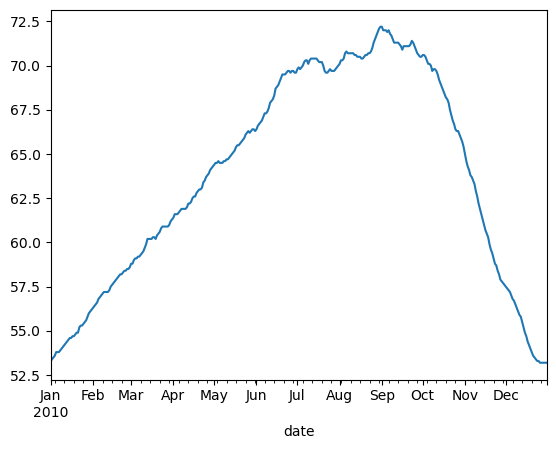

In [8]:
df1.resample('D')['temp'].max().plot()

4. Which month is the coldest, on average?

In [9]:
df1.resample('M').min().sort_values('temp').head(1)

,temp,date
date,,
2010-12-31,45.6,2010-12-01


5. Which month has the highest average temperature?

In [10]:
df1.resample('M').max().sort_values('temp', ascending=False).head(1)

,temp,date
date,,
2010-08-31,72.2,2010-08-31 23:00:00


6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [11]:
df1['temp_range'] = df1.resample('D').temp.max() - df1.resample('D').temp.min()

In [12]:
df1[df1.temp_range == df1['temp_range'].max()]

,temp,date,temp_range
date,,,
2010-08-31,58.8,2010-08-31,15.0


7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

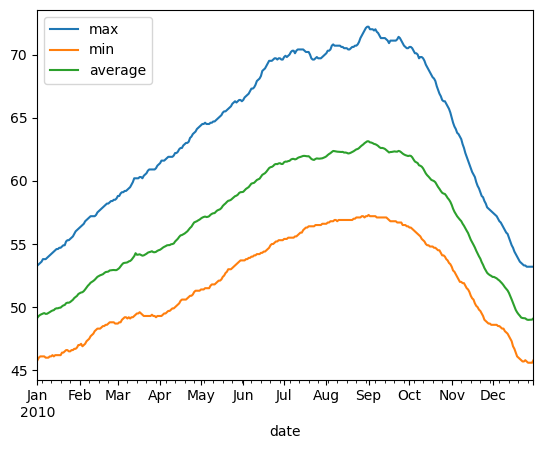

In [13]:
df1.resample('D').temp.max().plot()
df1.resample('D').temp.min().plot()
df1.resample('D').temp.mean().plot()
plt.legend(['max', 'min', 'average'])
plt.show()


## seattle_weather

In [14]:
df2 = data.seattle_weather()

1. Which year and month combination has the highest amount of precipitation?

In [15]:
df2 = df2.set_index(df2['date'])

In [16]:
df2.resample('M').sum().sort_values('precipitation', ascending = False).head(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

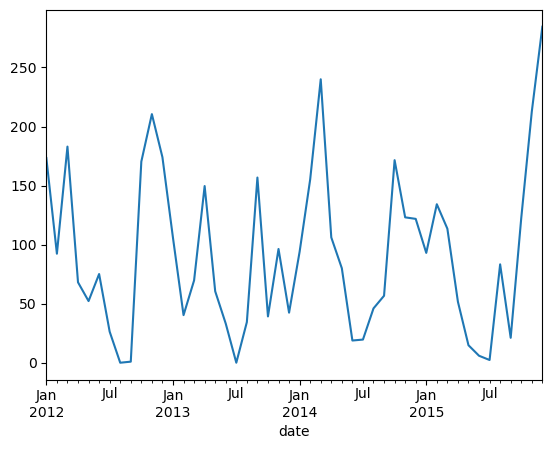

In [17]:
df2.resample('M').sum()['precipitation'].plot()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

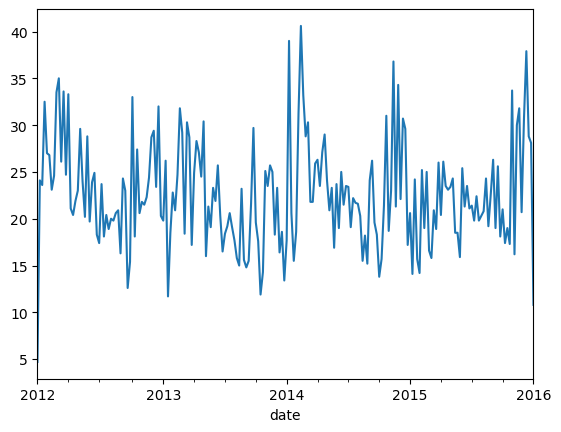

In [18]:
df2.resample('W').sum()['wind'].plot()

4. Which year-month combination is the windiest?

In [19]:
df2.resample('M').sum().sort_values('wind', ascending = False).head(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [20]:
df2 = pd.get_dummies(df2, columns=['weather'])

In [21]:
df2.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind',
       'weather_drizzle', 'weather_fog', 'weather_rain', 'weather_snow',
       'weather_sun'],
      dtype='object')

In [22]:
df2.resample('Y').sum().sort_values('weather_sun', ascending= False).head(1)

,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
date,,,,,,,,,
2014-12-31,1232.8,6203.5,3161.8,1236.5,0,151,3,0,211


6. In which month does it rain the most?

In [23]:
df2.resample('Y').sum().sort_values('weather_rain', ascending= False).head(1)

,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
date,,,,,,,,,
2012-12-31,1226.0,5591.3,2668.0,1244.7,31,5,191,21,118


7. Which month has the most number of days with a non-zero amount of precipitation?

In [24]:
df2[df2.precipitation > 0.0].resample('M').count().sort_values('precipitation', ascending= False).head(1)

,date,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
date,,,,,,,,,,
2012-12-31,27,27,27,27,27,27,27,27,27,27


## flights_20k

In [25]:
df3 = data.flights_20k()

In [26]:
df3.index.max() - df3.index.min()

19999

1. Convert any negative delays to 0.

In [27]:
df3 = df3.set_index(df3['date'])

In [28]:
df3.delay[df3.delay < 0] = 0

In [29]:
df3.head()

,date,delay,distance,origin,destination
date,,,,,
2001-01-13 14:56:00,2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,2001-03-30 21:45:00,0,229,STL,IND


2. Which hour of the day has the highest average delay?

In [30]:
df3['hour'] = df3.index.hour

In [31]:
df3.groupby(by='hour').mean().sort_values('delay', ascending = False).head(1)

,delay,distance
hour,,
3,302.5,322.0


3. Does the day of the week make a difference in the delay amount?

In [32]:
df3['weekday'] = df3.index.weekday

In [33]:
df3.groupby(by='weekday').mean().sort_values('delay', ascending = False)

,delay,distance,hour
weekday,,,
4,17.757596,501.118230,13.667107
3,12.821322,485.175025,13.619728
2,11.032478,501.009094,13.588828
6,10.413542,507.987758,14.236419
1,9.410866,496.021732,13.397963
5,8.431498,550.889031,13.010670
0,7.165772,505.032215,13.454362


4. Does the month make a difference in the delay amount?

In [34]:
df3['month'] = df3.index.month

In [35]:
df3.groupby(by='month').mean().sort_values('delay', ascending = False)

,delay,distance,hour,weekday
month,,,,
2,12.306106,511.156170,13.644182,2.913203
1,11.301592,500.391952,13.552771,2.758255
3,9.875287,504.712069,13.531897,2.975575


## Bonus: iowa_electricity

In [36]:
df4 = data.iowa_electricity()

1. For each row, calculate the percentage of the year's total that energy source provided.

In [37]:
df4.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [38]:
source_total = df4.groupby('source')['net_generation'].sum()

In [39]:
df4 = df4.merge(source_total, on='source', how='left')

In [40]:
df4['source_total_percent'] = round(df4.net_generation_x / df4.net_generation_y,3)

In [42]:
df4.source.value_counts()

Fossil Fuels      17
Nuclear Energy    17
Renewables        17
Name: source, dtype: int64

2. Lineplot of generation over time, color by source

In [50]:
df4[df4.source == 'Fossil Fuels']

,year,source,net_generation_x,net_generation_y,percent
0,2001-01-01,Fossil Fuels,35361,620129,0.057
1,2002-01-01,Fossil Fuels,35991,620129,0.058
2,2003-01-01,Fossil Fuels,36234,620129,0.058
3,2004-01-01,Fossil Fuels,36205,620129,0.058
4,2005-01-01,Fossil Fuels,36883,620129,0.059
5,2006-01-01,Fossil Fuels,37014,620129,0.060
6,2007-01-01,Fossil Fuels,41389,620129,0.067
7,2008-01-01,Fossil Fuels,42734,620129,0.069
8,2009-01-01,Fossil Fuels,38620,620129,0.062
9,2010-01-01,Fossil Fuels,42750,620129,0.069


<function matplotlib.pyplot.show(close=None, block=None)>

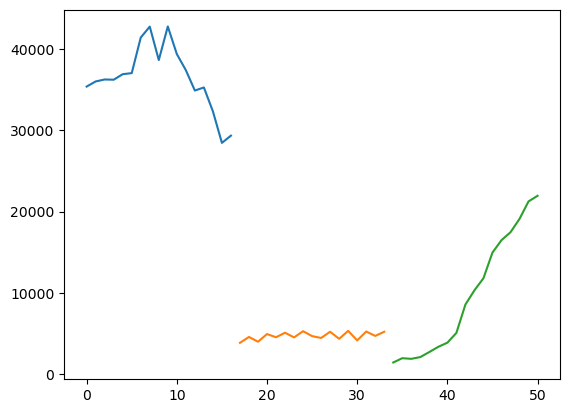

In [55]:
plt.plot(df4[df4.source == 'Fossil Fuels'].net_generation_x)
plt.plot(df4[df4.source == 'Nuclear Energy'].net_generation_x)
plt.plot(df4[df4.source == 'Renewables'].net_generation_x)
plt.show

3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [46]:
df4.pivot_table(values=['source', 'year'],columns=['year'],aggfunc='sum')

ValueError: Grouper for 'year' not 1-dimensional

4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

5. Is the total generation increasing over time?
- How would you control for increasing consumption over time when considering how much energy is coming from each source?
- Express each number as a % of the year's total

1. Use the sf_temps dataset

In [38]:
df5 = data.sf_temps()

In [39]:
df5 = df5.set_index(df5['date'])

2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [40]:
df5['temp_category'] = pd.qcut(df5.temp,q=4, labels= ['cold', 'cool', 'warm', 'hot'])

In [41]:
df5.temp_category.value_counts()

cool    2218
cold    2210
hot     2175
warm    2156
Name: temp_category, dtype: int64

3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

In [48]:
df5['month'] = df5.index.month

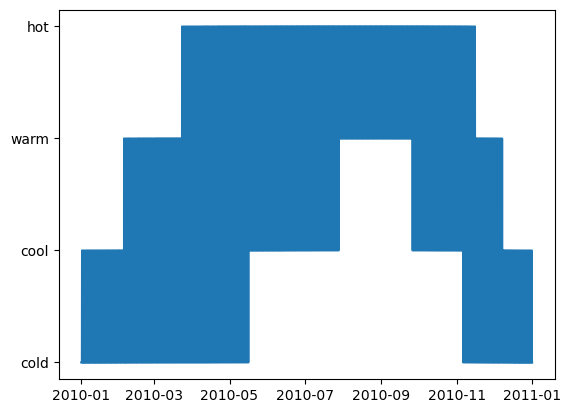

In [50]:
plt.plot(df5.temp_category)

4. Create pretty labels for time plots

5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

## Explore the birdstrikes dataset.

In [8]:
df6 = data.birdstrikes()